In [2]:
# employee_model_training.ipynb

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('adult.csv', skipinitialspace=True)
df.columns = [c.strip() for c in df.columns]
df = df.replace('?', np.nan).dropna()

# Remove outliers
def remove_outliers(df, col):
    q1 = df[col].astype(float).quantile(0.25)
    q3 = df[col].astype(float).quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col].astype(float) >= lower) & (df[col].astype(float) <= upper)]

for col in ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']:
    df = remove_outliers(df, col)

# Encode categorical columns
label_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
              'race', 'gender', 'native-country', 'income']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = (acc, model)

# Train Deep Learning model
dl_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
dl_loss, dl_acc = dl_model.evaluate(X_test, y_test, verbose=0)
results['Deep Learning'] = (dl_acc, dl_model)

# Save best model
best_model_name = max(results, key=lambda k: results[k][0])
print(f"Best model: {best_model_name} - Accuracy: {results[best_model_name][0]:.4f}")

if best_model_name == "Deep Learning":
    results[best_model_name][1].save("best_model.h5")
    joblib.dump({'type': 'dl', 'encoder': le_dict, 'scaler': scaler}, 'preprocessor.pkl')
else:
    joblib.dump(results[best_model_name][1], 'best_model.pkl')
    joblib.dump({'type': 'ml', 'encoder': le_dict, 'scaler': scaler}, 'preprocessor.pkl')


Matplotlib is building the font cache; this may take a moment.


Best model: Deep Learning - Accuracy: 0.8425


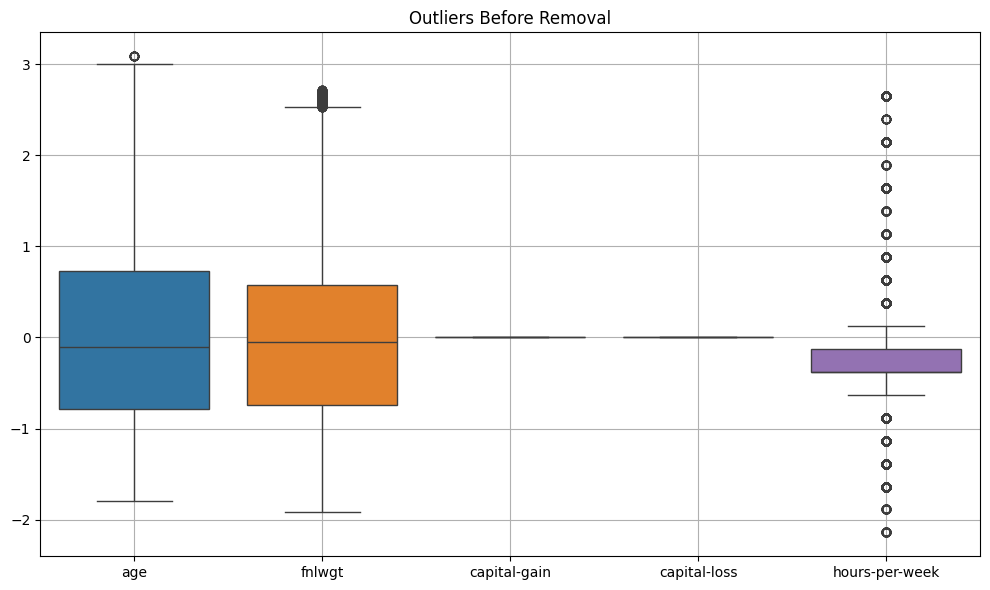

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']])
plt.title("Outliers Before Removal")
plt.grid(True)
plt.tight_layout()
plt.show()


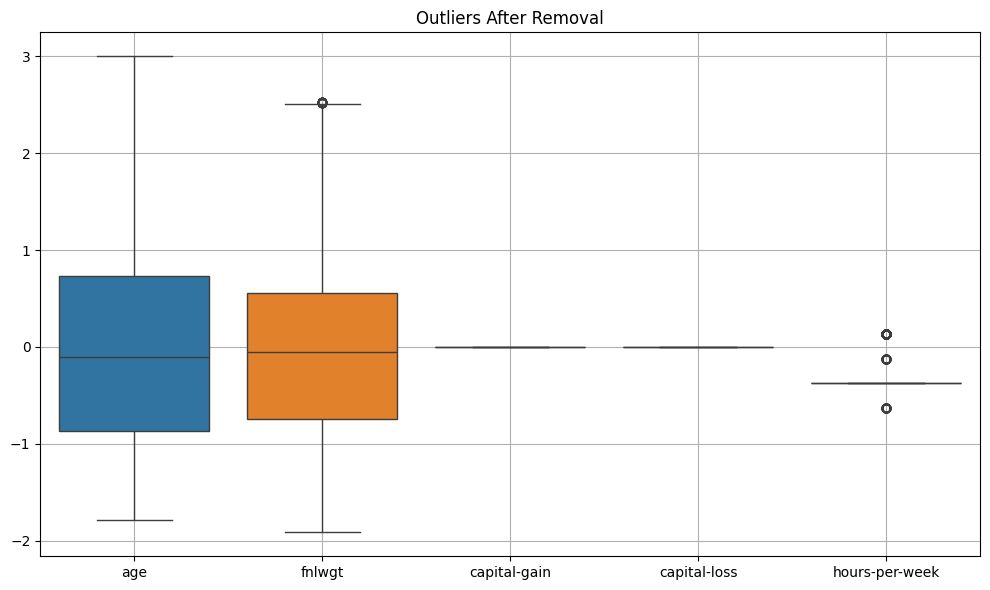

In [6]:
def remove_outliers(df, col):
    q1 = df[col].astype(float).quantile(0.25)
    q3 = df[col].astype(float).quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    df = remove_outliers(df, col)

# -----------------------
# Boxplot After Outlier Removal
# -----------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']])
plt.title("Outliers After Removal")
plt.grid(True)
plt.tight_layout()
plt.show()

Logistic Regression Accuracy: 0.8410
Random Forest Accuracy: 0.8391
KNN Accuracy: 0.8345
SVM Accuracy: 0.8195
Deep Learning Accuracy: 0.8541


C:\Users\santh\AppData\Local\Temp\ipykernel_33456\388117093.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='coolwarm')


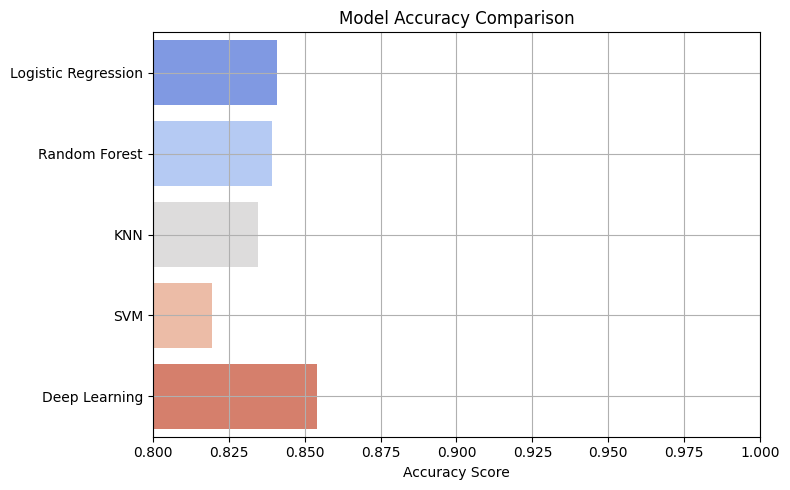


✅ Best Performing Model: Deep Learning (Accuracy: 0.8541)


In [7]:
label_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
              'race', 'gender', 'native-country', 'income']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

scaler = StandardScaler()
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[num_cols] = scaler.fit_transform(df[num_cols])

# -----------------------
# Train/Test Split
# -----------------------
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# -----------------------
# Train ML Models
# -----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# -----------------------
# Train Deep Learning Model
# -----------------------
dl_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
dl_loss, dl_acc = dl_model.evaluate(X_test, y_test, verbose=0)
results['Deep Learning'] = dl_acc
print(f"Deep Learning Accuracy: {dl_acc:.4f}")

# -----------------------
# Accuracy Comparison Graph
# -----------------------
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = list(results.values())
sns.barplot(x=accuracies, y=model_names, palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.xlim(0.8, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# Print Best Model
# -----------------------
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]
print(f"\n✅ Best Performing Model: {best_model_name} (Accuracy: {best_model_score:.4f})")